In [1]:
import pandas as pd

<b>Step - 1: Extract and Inspect </b>

In [2]:
imdb = pd.read_csv("imdb_top_1000.csv")

In [3]:
print(imdb.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [4]:
print(imdb.shape)

(1000, 16)


In [5]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [6]:
print(imdb.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


<b>Step - 2: Transformation</b>

In [7]:
# drop unnecessary columns
imdb.drop(columns=['Poster_Link','Certificate','Overview','Star1','Star2','Star3','Star4'], inplace = True)

In [8]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   object 
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB
None


In [9]:
imdb['Runtime'] = imdb['Runtime'].str.replace('min','')

In [10]:
print(imdb.head(2))

               Series_Title Released_Year Runtime         Genre  IMDB_Rating  \
0  The Shawshank Redemption          1994    142          Drama          9.3   
1             The Godfather          1972    175   Crime, Drama          9.2   

   Meta_score              Director  No_of_Votes        Gross  
0        80.0        Frank Darabont      2343110   28,341,469  
1       100.0  Francis Ford Coppola      1620367  134,966,411  


In [11]:
imdb['Runtime'] = imdb['Runtime'].astype(int)

In [12]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB
None


In [13]:
imdb['Gross'] = imdb['Gross'].str.replace(',','',regex=False)

In [14]:
print(imdb.head(2))

               Series_Title Released_Year  Runtime         Genre  IMDB_Rating  \
0  The Shawshank Redemption          1994      142         Drama          9.3   
1             The Godfather          1972      175  Crime, Drama          9.2   

   Meta_score              Director  No_of_Votes      Gross  
0        80.0        Frank Darabont      2343110   28341469  
1       100.0  Francis Ford Coppola      1620367  134966411  


In [15]:
imdb['Gross'] = pd.to_numeric(imdb['Gross'], errors = 'coerce')

In [16]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB
None


In [17]:
gross_median = imdb['Gross'].median()
print(gross_median)

23530892.0


In [18]:
imdb['Gross'] = imdb['Gross'].fillna(gross_median)

In [19]:
print(imdb.isnull().sum())

Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
No_of_Votes        0
Gross              0
dtype: int64


In [20]:
imdb['Gross'] = imdb['Gross'].astype(int)

In [21]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None


In [22]:
meta_mean = imdb['Meta_score'].mean()
print(meta_mean)

77.97153024911032


In [23]:
imdb['Meta_score'] = imdb['Meta_score'].fillna(meta_mean)

In [24]:
print(imdb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Runtime        1000 non-null   int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     1000 non-null   float64
 6   Director       1000 non-null   object 
 7   No_of_Votes    1000 non-null   int64  
 8   Gross          1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None


In [25]:
imdb['Released_Year'] = pd.to_numeric(imdb['Released_Year'],errors='coerce')

In [26]:
print(imdb['Released_Year'].dtype)

float64


In [27]:
print(imdb.isnull().sum())

Series_Title     0
Released_Year    1
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
No_of_Votes      0
Gross            0
dtype: int64


In [28]:
imdb_dropped = imdb.dropna()

In [34]:
print(imdb_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    float64
 2   Runtime        999 non-null    int64  
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Meta_score     999 non-null    float64
 6   Director       999 non-null    object 
 7   No_of_Votes    999 non-null    int64  
 8   Gross          999 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 78.0+ KB
None


<b>Step - 3: Analysis and Visualization</b>

In [35]:
import matplotlib.pyplot as plt

In [36]:
print("\n---- Question 1: Top 10 Highest-Rated Directors -----")

top_directors = imdb_dropped.groupby('Director')['IMDB_Rating'].mean()
print(top_directors)


---- Question 1: Top 10 Highest-Rated Directors -----
Director
Aamir Khan             8.40
Aaron Sorkin           7.80
Abdellatif Kechiche    7.70
Abhishek Chaubey       7.80
Abhishek Kapoor        7.70
                       ... 
Zack Snyder            7.60
Zaza Urushadze         8.20
Zoya Akhtar            8.05
Çagan Irmak            8.30
Ömer Faruk Sorak       8.00
Name: IMDB_Rating, Length: 548, dtype: float64


In [37]:
top_directors = top_directors.sort_values(ascending=False)
print(top_directors)

Director
Frank Darabont        8.95
Lana Wachowski        8.70
Irvin Kershner        8.70
Masaki Kobayashi      8.60
Fernando Meirelles    8.60
                      ... 
Tom Tykwer            7.60
Bennett Miller        7.60
Blake Edwards         7.60
Aneesh Chaganty       7.60
Walter Hill           7.60
Name: IMDB_Rating, Length: 548, dtype: float64


In [38]:
print(top_directors.head(10))

Director
Frank Darabont        8.95
Lana Wachowski        8.70
Irvin Kershner        8.70
Masaki Kobayashi      8.60
Fernando Meirelles    8.60
George Lucas          8.60
Sudha Kongara         8.60
Thomas Kail           8.60
Roberto Benigni       8.60
Milos Forman          8.50
Name: IMDB_Rating, dtype: float64


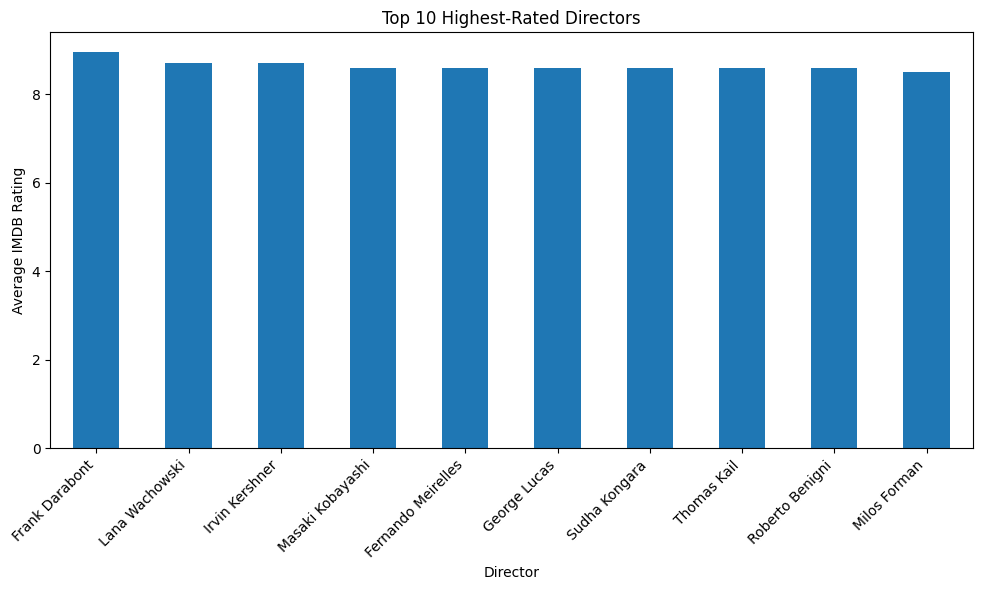

In [41]:
top_directors.head(10).plot(
    kind = 'bar',
    title = 'Top 10 Highest-Rated Directors',
    xlabel = 'Director',
    ylabel = 'Average IMDB Rating',
    figsize = (10,6)
)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('top_10_directors.png')
plt.show()

In [43]:
print("\n--- Question 2: Most Profitable Genres ---")

profitable_genres = imdb_dropped.groupby('Genre')['Gross'].mean()
print(profitable_genres)


--- Question 2: Most Profitable Genres ---
Genre
Action, Adventure               2.295072e+08
Action, Adventure, Biography    2.353089e+07
Action, Adventure, Comedy       1.943945e+08
Action, Adventure, Crime        2.353089e+07
Action, Adventure, Drama        1.939927e+08
                                    ...     
Mystery, Romance, Thriller      3.200000e+06
Mystery, Sci-Fi, Thriller       3.575990e+07
Mystery, Thriller               2.998097e+07
Thriller                        1.755074e+07
Western                         1.455538e+07
Name: Gross, Length: 202, dtype: float64


In [46]:
profitable_genres = profitable_genres.sort_values(ascending = False)
print(profitable_genres)

Genre
Family, Sci-Fi                4.351106e+08
Action, Adventure, Fantasy    3.527235e+08
Action, Adventure, Family     3.019592e+08
Action, Adventure, Sci-Fi     2.808885e+08
Adventure, Fantasy            2.806852e+08
                                  ...     
Animation, Sci-Fi             1.938170e+05
Comedy, Music                 1.887510e+05
Animation, Action, Fantasy    1.510860e+05
Adventure, Drama, Musical     7.014700e+04
Action, Crime, Comedy         3.296000e+03
Name: Gross, Length: 202, dtype: float64


In [47]:
print(profitable_genres.head(10))

Genre
Family, Sci-Fi                4.351106e+08
Action, Adventure, Fantasy    3.527235e+08
Action, Adventure, Family     3.019592e+08
Action, Adventure, Sci-Fi     2.808885e+08
Adventure, Fantasy            2.806852e+08
Adventure, Thriller           2.600000e+08
Animation, Comedy, Crime      2.515140e+08
Action, Adventure             2.295072e+08
Action, Adventure, Mystery    2.090287e+08
Action, Adventure, Comedy     1.943945e+08
Name: Gross, dtype: float64


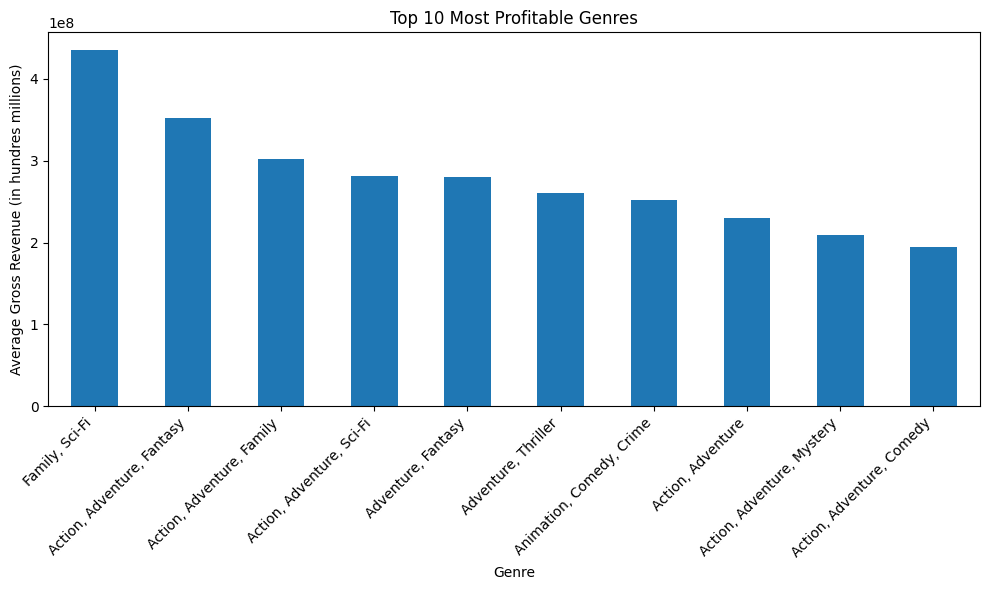

In [48]:
profitable_genres.head(10).plot(
    kind = 'bar',
    title = 'Top 10 Most Profitable Genres',
    xlabel = 'Genre',
    ylabel = 'Average Gross Revenue (in hundres millions)',
    figsize = (10,6)
)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.savefig('top_10_genres_by_revenue.png')
plt.show()

In [53]:
print("\n--- Question 3: Movie Runtime Trends Over Decades ---")
imdb_dropped = imdb_dropped.copy()
imdb_dropped['Decade'] = (imdb_dropped['Released_Year']//10)*10
print(imdb_dropped.head(3))


--- Question 3: Movie Runtime Trends Over Decades ---
               Series_Title  Released_Year  Runtime                 Genre  \
0  The Shawshank Redemption         1994.0      142                 Drama   
1             The Godfather         1972.0      175          Crime, Drama   
2           The Dark Knight         2008.0      152  Action, Crime, Drama   

   IMDB_Rating  Meta_score              Director  No_of_Votes      Gross  \
0          9.3        80.0        Frank Darabont      2343110   28341469   
1          9.2       100.0  Francis Ford Coppola      1620367  134966411   
2          9.0        84.0     Christopher Nolan      2303232  534858444   

   Decade  
0  1990.0  
1  1970.0  
2  2000.0  


In [55]:
runtime_by_decade = imdb_dropped.groupby('Decade')['Runtime'].mean()
print(runtime_by_decade)

Decade
1920.0     86.272727
1930.0    102.125000
1940.0    109.800000
1950.0    118.678571
1960.0    126.452055
1970.0    122.736842
1980.0    121.224719
1990.0    123.613333
2000.0    123.607595
2010.0    127.756198
2020.0    126.666667
Name: Runtime, dtype: float64


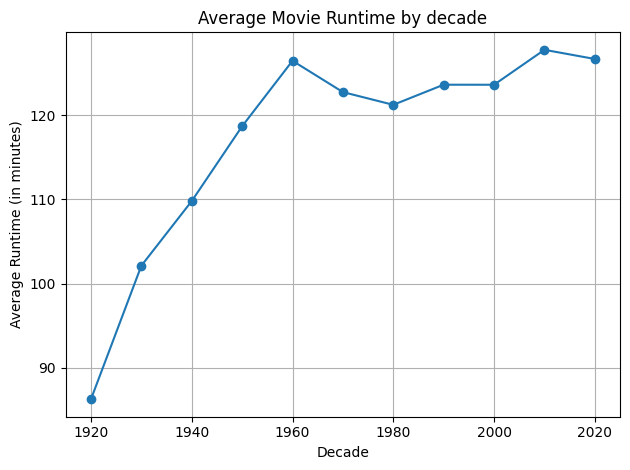

In [57]:
runtime_by_decade.plot(
    kind = 'line',
    title = 'Average Movie Runtime by decade',
    xlabel='Decade',
    ylabel='Average Runtime (in minutes)',
    marker='o'
)
plt.grid(True)
plt.tight_layout()
plt.savefig('runtime_by_decade.png')
plt.show()


--- Question 4: Relationship between IMDB Rating and Gross Revenue ---


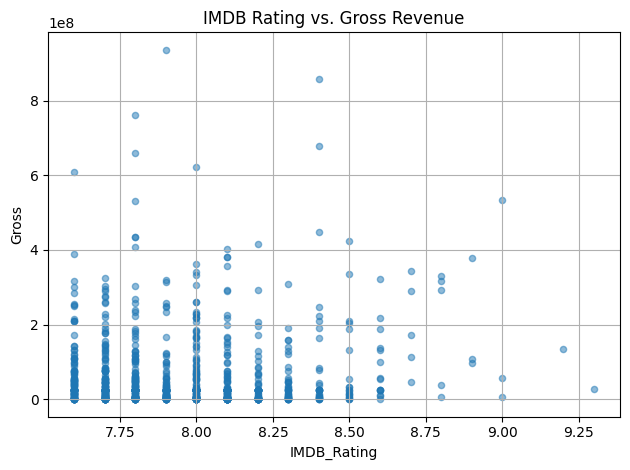

In [58]:
print("\n--- Question 4: Relationship between IMDB Rating and Gross Revenue ---")

imdb_dropped.plot(
    kind = 'scatter',
    x = 'IMDB_Rating',
    y = 'Gross',
    title = 'IMDB Rating vs. Gross Revenue',
    alpha = 0.5
)
plt.grid(True)
plt.tight_layout()
plt.savefig('rating_vs_gross.png')
plt.show()

In [59]:
imdb_dropped.to_csv('cleaned_imdb_data.csv', index = False)
print("\nETL and Analysis Complete! Cleaned data saved to 'cleaned_imdb_data.csv'.")


ETL and Analysis Complete! Cleaned data saved to 'cleaned_imdb_data.csv'.
